<a href="https://colab.research.google.com/github/afifahsalsa/PCVK_Genap_2023/blob/main/Week_11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Object Detection**

Metode yang digunakan:
1. Template Matching
2. Edge Detection
3. Corener Detection
4. Grid Detection
5. Contour Detection


In [1]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Template Matching**

2. Menggunakan library openCV cv.matchTemplate() dengan parameter
- image: citra input
- templ: template yg dicari, ukurannya tidak boleh lebih besar dari citra input
- method: metode dari template matching

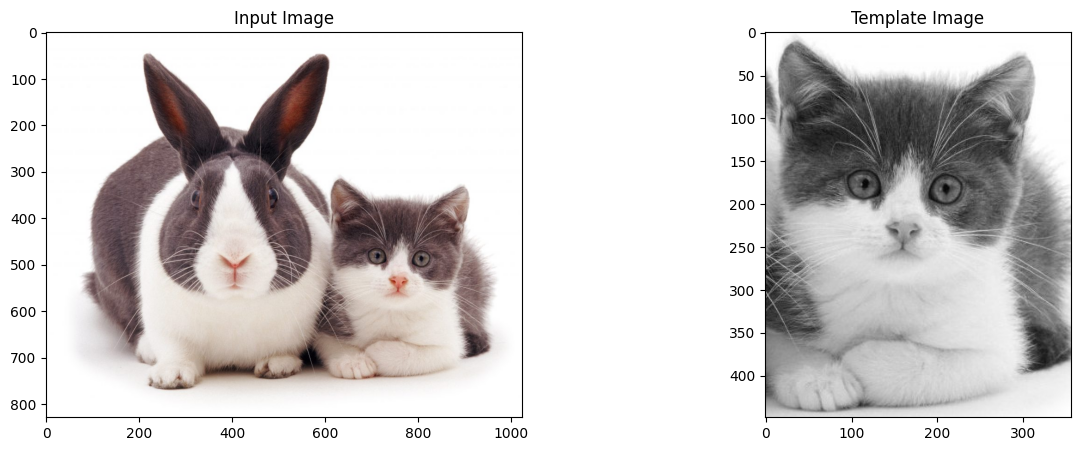

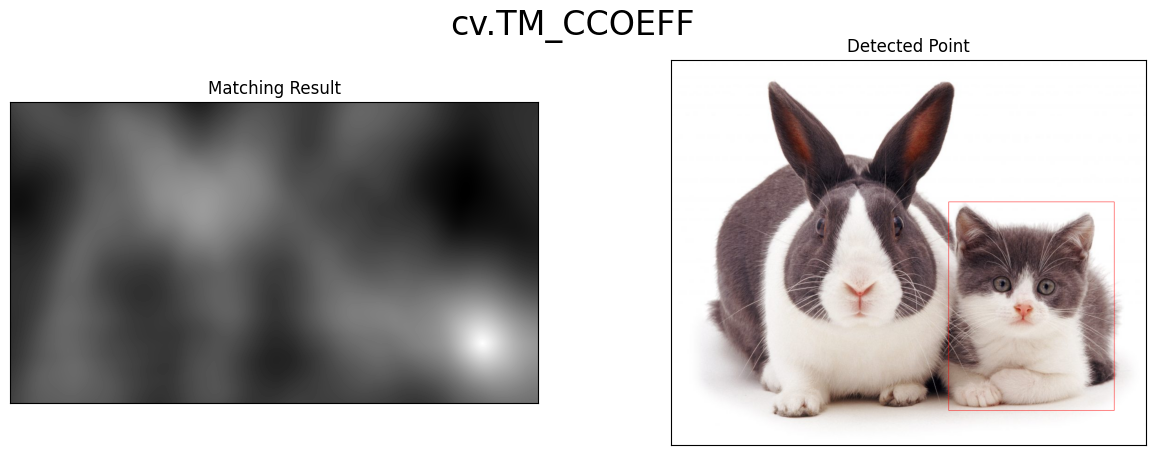

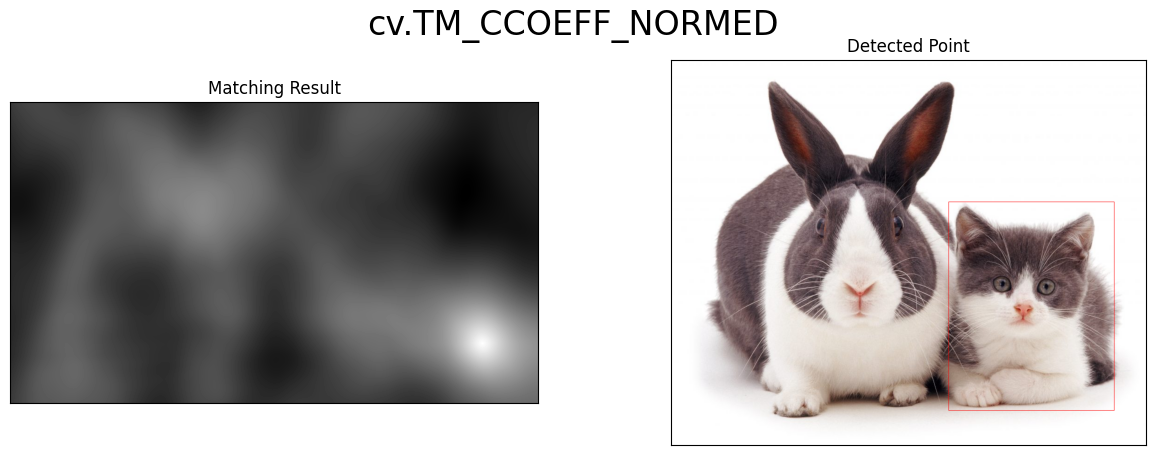

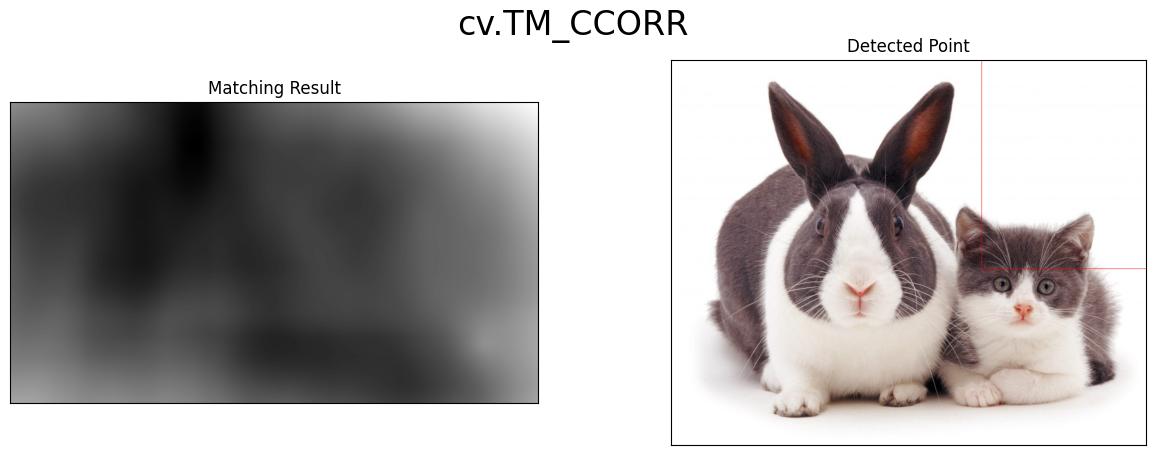

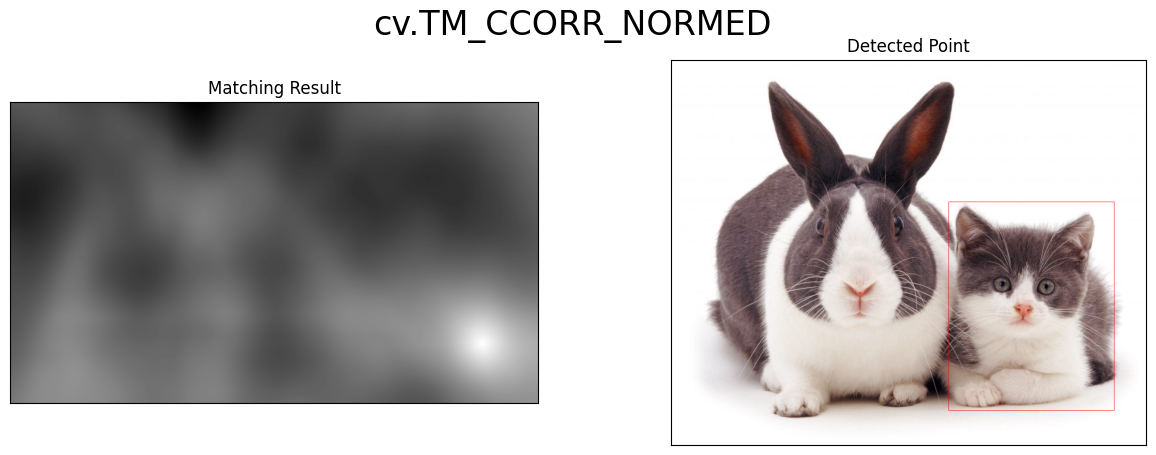

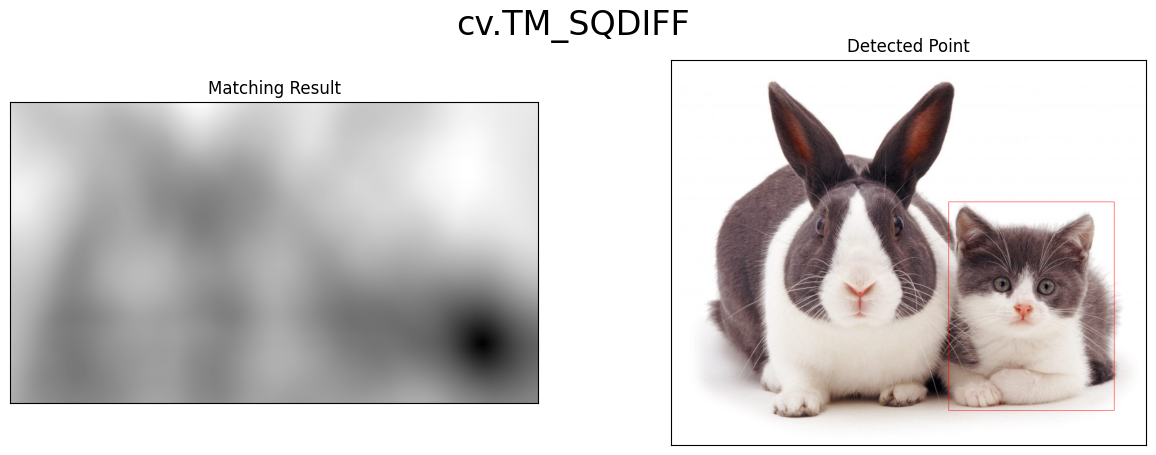

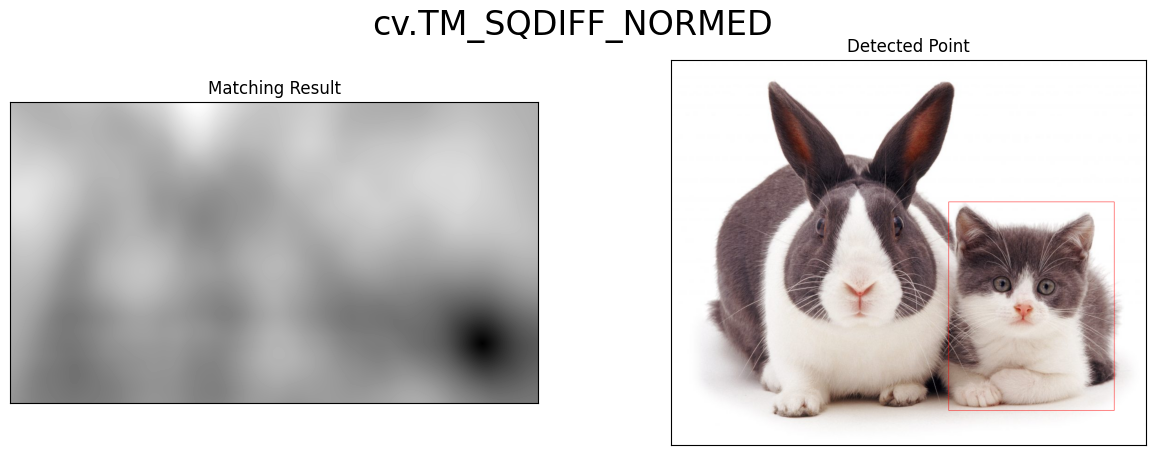

In [3]:
img = cv.imread('/content/drive/MyDrive/pcvk_week11/cats_and_bunnies.jpg')
img_gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
img_copy = img.copy()

template = cv.imread('/content/drive/MyDrive/pcvk_week11/cat2_templatejpg.jpg',0)
# mengatur dimensi citra
w, h = template.shape[::-1]

# print input image dan template
f, axarr = plt. subplots(1,2,figsize=(15,5)) #membuat 2 plot untuk citra input dan template
axarr[0].imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB)), axarr[0].set_title("Input Image")
axarr[1].imshow(cv.cvtColor(template, cv.COLOR_BGR2RGB)), axarr[1].set_title("Template Image")

# All the 6 methods for comparison in a list
methods = ['cv.TM_CCOEFF', 'cv.TM_CCOEFF_NORMED', 'cv.TM_CCORR',
            'cv.TM_CCORR_NORMED', 'cv.TM_SQDIFF', 'cv.TM_SQDIFF_NORMED']

for meth in methods:
    img = img_copy.copy()
    method = eval(meth)
    # Apply template Matching
    res = cv.matchTemplate(img_gray,template,method)
    min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)
    # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
    if method in [cv.TM_SQDIFF, cv.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)

    cv.rectangle(img,top_left, bottom_right,(0,0,255))
    plt.figure(figsize=(15,5))
    plt.subplot(121),plt.imshow(res,cmap = 'gray')
    plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
    plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
    print("\n\n")
    plt.suptitle(meth, fontsize=24)
    plt.show()

3. Implementasikan konsep template matching tanpa menggunakan library openCV untuk multiple object

Text(0.5, 1.0, 'Result')

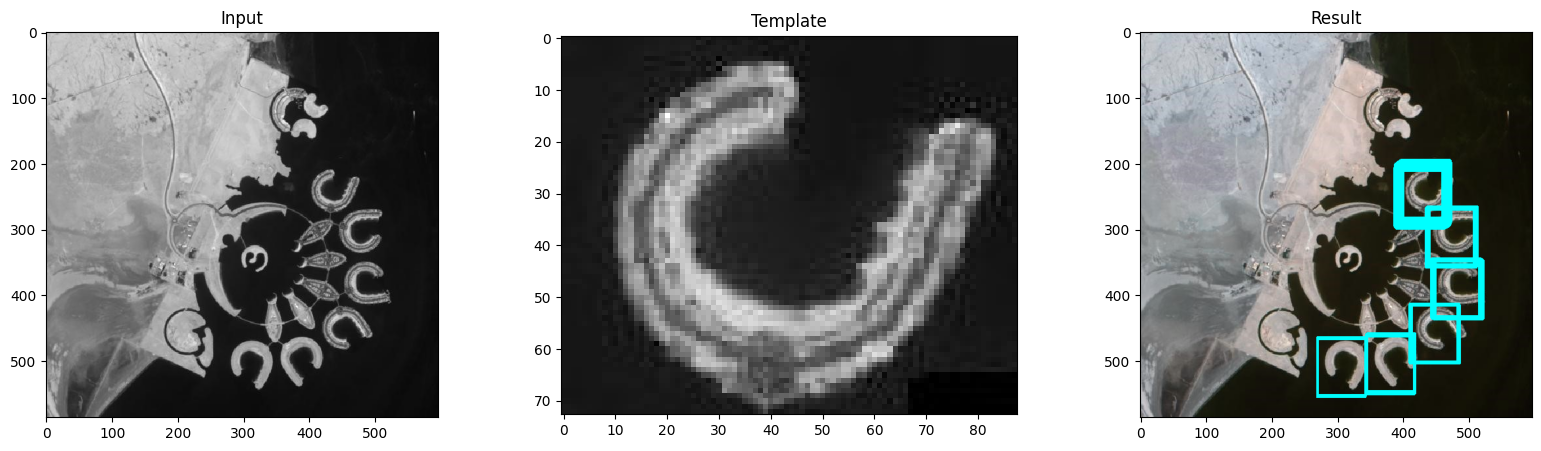

In [4]:
from google.colab.patches import cv_imshow

img = cv.imread('/content/drive/MyDrive/pcvk_week11/bahrain.jpg',0)
template = cv.imread('/content/drive/MyDrive/pcvk_week11/bahrain-template.jpg', 0)
img_copy = cv.imread('/content/drive/MyDrive/pcvk_week11/bahrain.jpg')
# Dapatkan ukuran gdambar asli dan template
tinggi, lebar = template.shape[::-1]

# Lakukan template matching dengan metode CCOEFF
result = cv.matchTemplate(img, template, cv.TM_CCOEFF_NORMED)

# Dapatkan lokasi dengan nilai korelasi tertinggi
min_val, max_val, min_loc, max_loc = cv.minMaxLoc(result)

# Tentukan batasan threshold (misalnya, 0.8) untuk hasil yang dianggap cocok
threshold = 0.43

# Dapatkan lokasi hasil yang di atas threshold
lokasi_cocok = np.where(result >= threshold)

# Gambar kotak di sekitar area yang cocok
for pt in zip(*lokasi_cocok[::-1]):
    cv.rectangle(img_copy, pt, (pt[0] + lebar, pt[1] + tinggi), (0, 255, 255), 1)

# Tampilkan gambar asli dengan kotak-kotak hasil yang cocok
fig, axarr = plt.subplots(1, 3, figsize=(20,5))
axarr[0].imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
axarr[0].set_title('Input')
axarr[1].imshow(template, cmap='gray')
axarr[1].set_title('Template')
axarr[2].imshow(img_copy, cmap='gray')
axarr[2].set_title('Result')

4. Implementasikan metode Sobel Edge Detection, Canny Edge Detection dan Laplacian Edge detection pada openCV

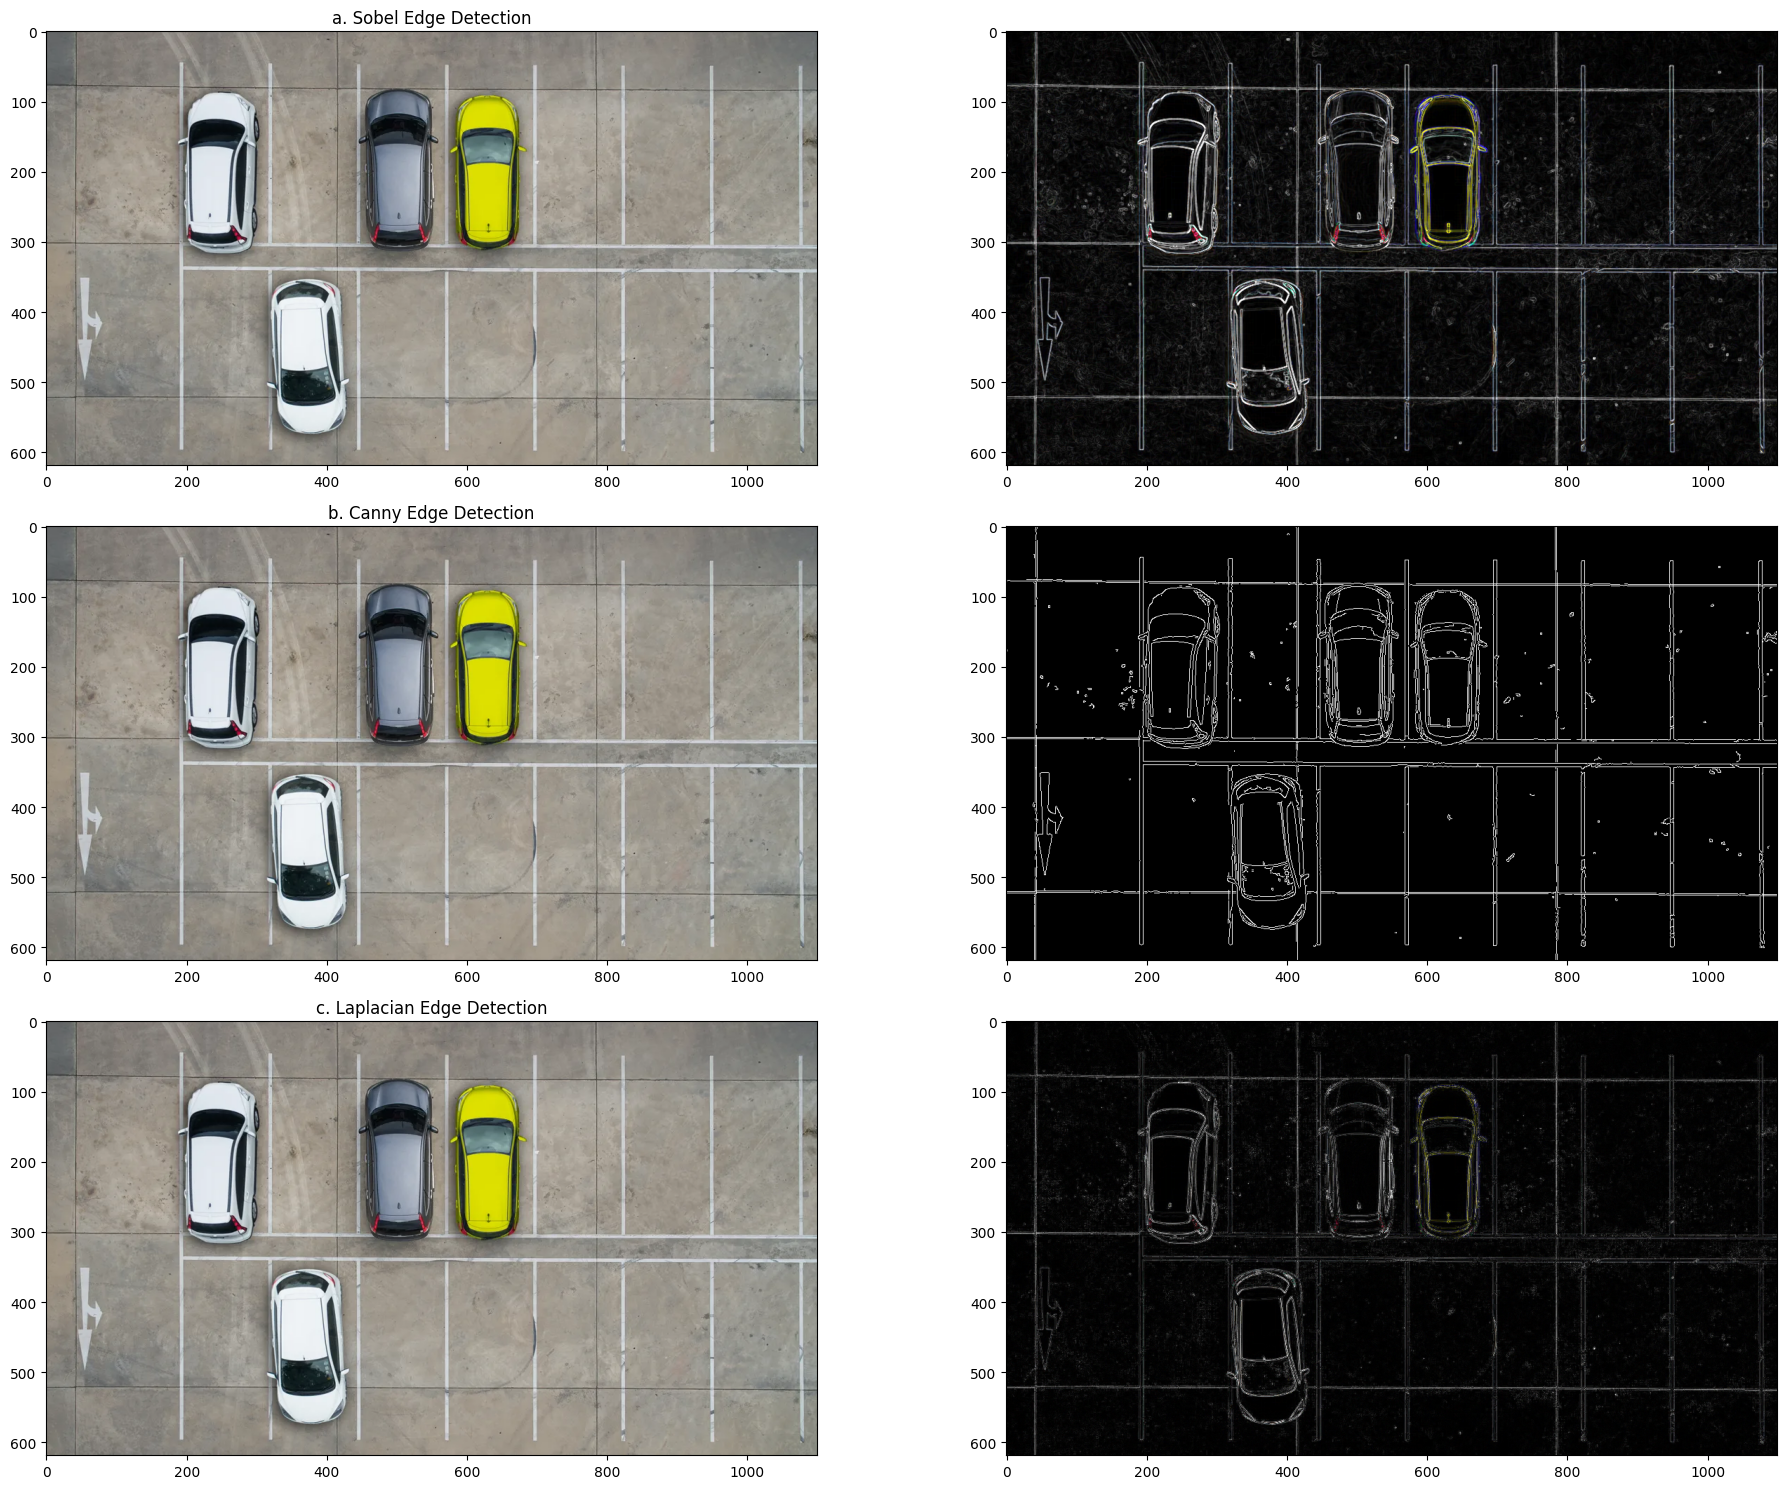

In [22]:
img = cv.imread('/content/drive/MyDrive/pcvk_week11/car-park.jpg')
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
img1 = cv.GaussianBlur(gray, (3, 3), 0)

img_sobelx = cv.Sobel(img, cv.CV_64F, 1, 0, ksize=3)
img_sobely = cv.Sobel(img, cv.CV_64F, 0, 1, ksize=3)
img_sobelxy = cv.addWeighted(cv.convertScaleAbs(img_sobelx), 0.5, cv.convertScaleAbs(img_sobely), 0.5, 0)

edges_canny = cv.Canny(img, 100, 200)

img_laplacian = cv.Laplacian(img, cv.CV_64F)
img_laplacian = cv.convertScaleAbs(img_laplacian)


f, axarr = plt.subplots(3, 2, figsize=(20, 15))  # 3 baris, 2 kolom

axarr[0, 0].imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
axarr[0, 0].set_title('a. Sobel Edge Detection')
axarr[0, 1].imshow(cv.cvtColor(img_sobelxy, cv.COLOR_BGR2RGB))

axarr[1, 0].imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
axarr[1, 0].set_title('b. Canny Edge Detection')
axarr[1, 1].imshow(cv.cvtColor(edges_canny, cv.COLOR_BGR2RGB))

axarr[2, 0].imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
axarr[2, 0].set_title('c. Laplacian Edge Detection')
axarr[2, 1].imshow(cv.cvtColor(img_laplacian, cv.COLOR_BGR2RGB))

plt.tight_layout()
plt.show()

5. Implementasikan metode Harris Corner Detection dan Shi-Tomasi Detection pada
OpenCV

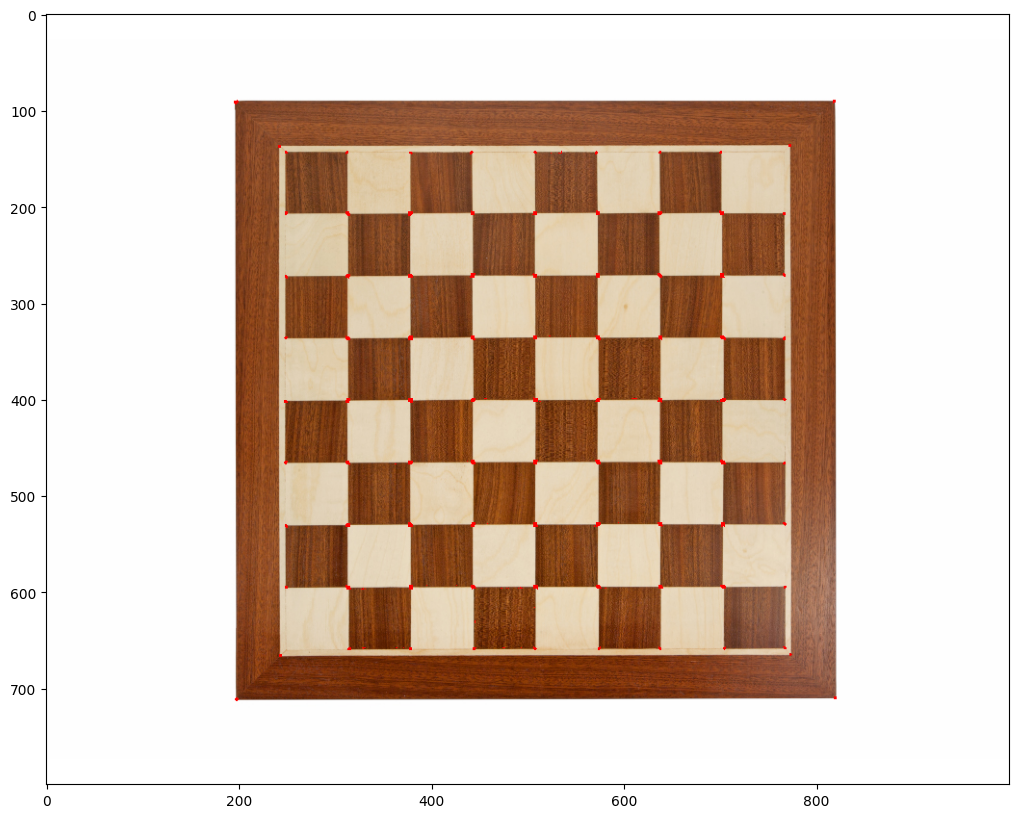

In [24]:
#Harris Corner Detection

img = cv.imread('/content/drive/MyDrive/pcvk_week11/chess-board.jpg')
gray_img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
dst = cv.cornerHarris(gray_img,3,1,0.04)

gray_img = np.float32(gray_img)
harris_output = cv.cornerHarris(gray_img,2,3, 3)
#hasil harris corner dilakukan dilasi untuk menandai sudut
harris_output = cv.dilate(harris_output, None)

#Threshold untuk mengoptimalkan nilai
img[dst>0.01*dst.max()]=[0,0,255]

plt.figure(figsize=(20,10))
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))

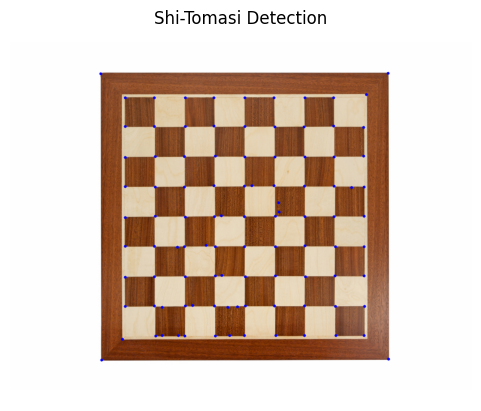

In [25]:
#shi - thomasi

img = cv.imread('/content/drive/MyDrive/pcvk_week11/chess-board.jpg')
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# Metode Shi-Tomasi Detection
corners = cv.goodFeaturesToTrack(gray, 100, 0.01, 10)

# Konversi koordinat titik sudut ke bilangan bulat
corners = np.int0(corners)

# Gambar lingkaran pada setiap sudut yang ditemukan
for corner in corners:
    x, y = corner.ravel()
    cv.circle(img, (x, y), 3, 255, -1)

# Tampilkan hasil Shi-Tomasi Detection
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.title('Shi-Tomasi Detection')
plt.axis('off')
plt.show()

6. Implementasikan metode Hough Transform pada OpenCV

number of Hough lines: 33
Number of filtered lines: 1
Number of filtered lines: 2
Number of filtered lines: 3
Number of filtered lines: 4
Number of filtered lines: 5
Number of filtered lines: 6
Number of filtered lines: 7
Number of filtered lines: 8
Number of filtered lines: 9
Number of filtered lines: 10
Number of filtered lines: 11
Number of filtered lines: 12
Number of filtered lines: 13
Number of filtered lines: 14
Number of filtered lines: 14
Number of filtered lines: 15
Number of filtered lines: 15
Number of filtered lines: 15
Number of filtered lines: 16
Number of filtered lines: 16
Number of filtered lines: 17
Number of filtered lines: 17
Number of filtered lines: 18
Number of filtered lines: 18
Number of filtered lines: 19
Number of filtered lines: 19
Number of filtered lines: 19
Number of filtered lines: 20
Number of filtered lines: 20
Number of filtered lines: 20
Number of filtered lines: 20
Number of filtered lines: 20
Number of filtered lines: 20


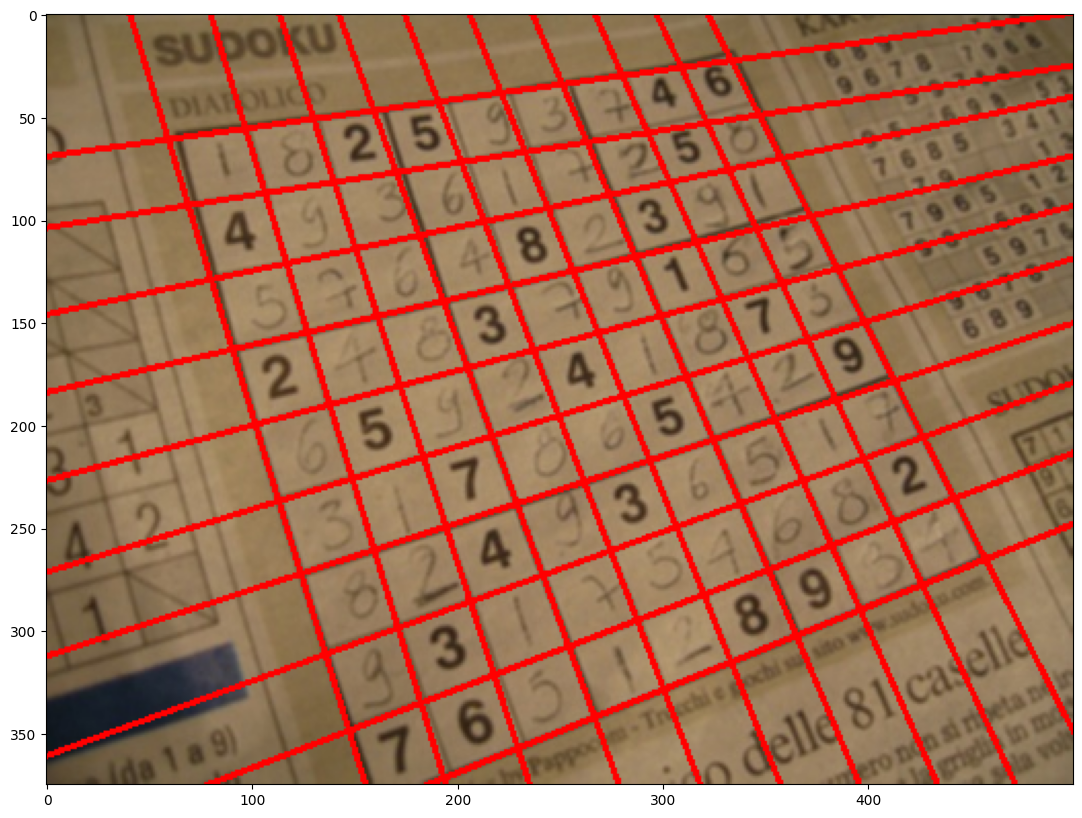

In [26]:
input_img = cv.imread('/content/drive/MyDrive/pcvk_week11/sudoku.jpg')
img_gray = cv.cvtColor(input_img, cv.COLOR_BGR2GRAY)

edges = cv.Canny (img_gray, 90, 150, apertureSize = 3)

kernel = np.ones((3,3), np.uint8)
edges = cv.dilate(edges,kernel,iterations = 1)

kernel = np.ones((5,5), np.uint8)
edges = cv.erode (edges, kernel, iterations = 1)

lines = cv.HoughLines(edges,1,np.pi/180,150)


if not lines.any():
    print('No lines found')
    exit()

if filter:
    rho_threshold = 15
    theta_threshold = 0.1


    similar_lines = {i : [] for i in range(len(lines))}
    for i in range(len(lines)):
      for j in range (len (lines)):
        if i == j:
            continue

        rho_i, theta_i = lines[i][0]
        rho_j, theta_j = lines[j][0]
        if abs(rho_i - rho_j) < rho_threshold and abs (theta_i - theta_j) < theta_threshold:
            similar_lines[i].append(j)

    indices = [i for i in range(len(lines))]
    indices.sort(key=lambda x: len(similar_lines[x]))

    line_flags = len(lines) *[True]
    for i in range(len(lines) - 1):
        if not line_flags [indices[i]]:
            continue

        for j in range(i + 1, len(lines)):
            if not line_flags[indices[j]]:
                continue
            rho_i, theta_i = lines[indices[i]][0]
            rho_j, theta_j = lines[indices[j]][0]
            if abs(rho_i - rho_j) < rho_threshold and abs(theta_i - theta_j) < theta_threshold:
                line_flags [indices[j]] = False
    print('number of Hough lines:', len(lines))

    filtered_lines = []

    if filter:
        for i in range(len(lines)):
            if line_flags[i]:
                filtered_lines.append(lines[i])

            print('Number of filtered lines:', len(filtered_lines ))
    else:
        filtered_lines = lines

    for line in filtered_lines:
        rho, theta = line [0]
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a*rho
        y0 = b*rho
        x1 = int(x0 + 1000*(-b))
        y1 = int(y0 + 1000*(a))
        x2 = int(x0 - 1000*(-b))
        y2 = int(y0 - 1000*(a))

        cv.line(input_img, (x1, y1), (x2,y2),(0,0,255),2)

    plt.figure(figsize=(20,10))
    plt.imshow(cv.cvtColor(input_img, cv.COLOR_BGR2RGB))

7. Implementasikan fungsi findContours() pada OpenCV untuk contour detection

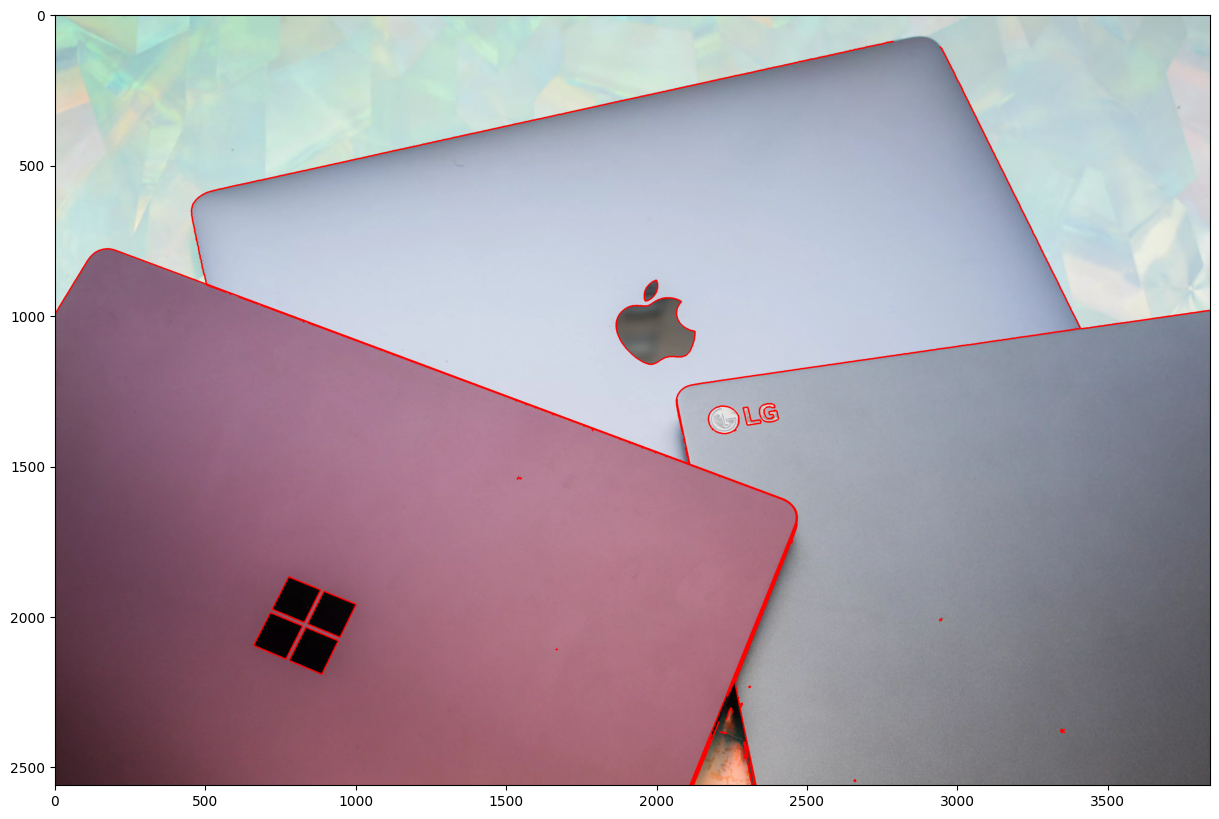

In [27]:
img = cv.imread('/content/drive/MyDrive/pcvk_week11/laptop.jpg')
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

edged = cv.Canny(img_gray, 30, 200)

contours, hierarchy = cv.findContours(edged, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_NONE)

cv.drawContours(img, contours, -1, (0,0,255), 3)

plt.figure(figsize=(20,10))
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))